<a href="https://colab.research.google.com/github/rachmazamalia/Capstone-Project/blob/main/Fruit_Vege_Detection_V2_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASET PREPARATION**

In [2]:
!pip install kaggle -q

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
from PIL import Image
import random

In [7]:
# Download Dataset 1
!kaggle datasets download -d alibaloch/vegetables-fruits-fresh-and-stale
# Download Dataset 2
!kaggle datasets download -d shivanir23/good-and-bad-fruits-ieee-extended

 98% 967M/986M [00:04<00:00, 236MB/s]
100% 986M/986M [00:05<00:00, 203MB/s]
 91% 184M/202M [00:00<00:00, 235MB/s]
100% 202M/202M [00:00<00:00, 242MB/s]


In [8]:
!mkdir dataset
!mkdir dataset/train
!mkdir dataset/test

**DATASET 1**

In [9]:
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshapples/*" -d "dataset/train/freshapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshbanana/*" -d "dataset/train/freshbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshcucumber/*" -d "dataset/train/freshcucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshokra/*" -d "dataset/train/freshokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshpatato/*" -d "dataset/train/freshpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/freshtamto/*" -d "dataset/train/freshtomato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenapples/*" -d "dataset/train/rottenapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenbanana/*" -d "dataset/train/rottenbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottencucumber/*" -d "dataset/train/rottencucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenokra/*" -d "dataset/train/rottenokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottenpatato/*" -d "dataset/train/rottenpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/train/rottentamto/*" -d "dataset/train/rottentomato"

In [10]:
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshapples/*" -d "dataset/test/freshapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshbanana/*" -d "dataset/test/freshbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshcucumber/*" -d "dataset/test/freshcucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshokra/*" -d "dataset/test/freshokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshpatato/*" -d "dataset/test/freshpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/freshtamto/*" -d "dataset/test/freshtomato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenapples/*" -d "dataset/test/rottenapples"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenbanana/*" -d "dataset/test/rottenbanana"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottencucumber/*" -d "dataset/test/rottencucumber"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenokra/*" -d "dataset/test/rottenokra"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottenpatato/*" -d "dataset/test/rottenpotato"
!unzip -j -q vegetables-fruits-fresh-and-stale.zip "dataset/test/rottentamto/*" -d "dataset/test/rottentomato"

**DATASET 2**

In [11]:
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Guava_Good/*" -d "dataset/train/freshguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Lime_Good/*" -d "dataset/train/freshlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Orange_Good/*" -d "dataset/train/freshorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Pomegranate_Good/*" -d "dataset/train/freshpomegranate"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Guava_Bad/*" -d "dataset/train/rottenguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Lime_Bad/*" -d "dataset/train/rottenlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Orange_Bad/*" -d "dataset/train/rottenorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/train/Pomegranate_Bad/*" -d "dataset/train/rottenpomegranate"

In [12]:
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Guava_Good/*" -d "dataset/test/freshguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Lime_Good/*" -d "dataset/test/freshlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Orange_Good/*" -d "dataset/test/freshorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Pomegranate_Good/*" -d "dataset/test/freshpomegranate"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Guava_Bad/*" -d "dataset/test/rottenguava"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Lime_Bad/*" -d "dataset/test/rottenlime"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Orange_Bad/*" -d "dataset/test/rottenorange"
!unzip -j -q good-and-bad-fruits-ieee-extended "IEEEFRUITSDATA_test&train/test/Pomegranate_Bad/*" -d "dataset/test/rottenpomegranate"

In [13]:
class_names = sorted(os.listdir('dataset/train/'))
print(class_names)

['freshapples', 'freshbanana', 'freshcucumber', 'freshguava', 'freshlime', 'freshokra', 'freshorange', 'freshpomegranate', 'freshpotato', 'freshtomato', 'rottenapples', 'rottenbanana', 'rottencucumber', 'rottenguava', 'rottenlime', 'rottenokra', 'rottenorange', 'rottenpomegranate', 'rottenpotato', 'rottentomato']


In [16]:
!ls

dataset				       sample_data
good-and-bad-fruits-ieee-extended.zip  vegetables-fruits-fresh-and-stale.zip
kaggle.json


(556, 408)


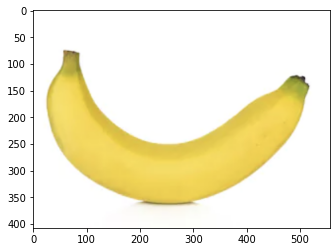

In [14]:
from keras.preprocessing.image import load_img
filenames = os.listdir('dataset/train/freshbanana')
sample = random.choice(filenames)
image = load_img('dataset/train/freshbanana/'+sample)
plt.imshow(image)
print(image.size)

In [15]:
def show_image(file_path):
    img = tf.keras.preprocessing.image.load_img(file_path, target_size=(228, 228))
    plt.imshow(img)
    plt.show()

In [16]:
def show_random_images_from(glob_path, seed):
    if seed:
        random.seed(seed)
    r = random.sample(glob(glob_path), 8)
    plt.figure(figsize=(10,6))
    for i, k in enumerate(r):
        plt.subplot(241 + i)
        plt.imshow(Image.open(k))
        plt.axis('off')

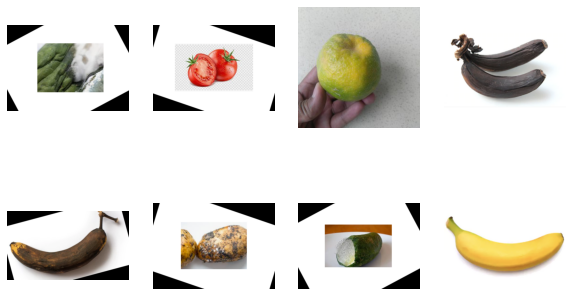

In [17]:
show_random_images_from("dataset/*/*/*", seed=420)

# **DATA AUGMENTATION**

In [18]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [19]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # randomly rotate images 
    zoom_range=0.1,  # randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally 
    height_shift_range=0.1,  # randomly shift images vertically 
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest') 

train_generator = datagen.flow_from_directory(
    '/content/dataset/train', 
    target_size=(150, 150),
    batch_size=126,
	  class_mode='categorical')

test_generator = datagen.flow_from_directory(
    '/content/dataset/test',
     target_size=(150, 150),
     batch_size=126,
	   class_mode='categorical')

Found 14216 images belonging to 20 classes.
Found 6053 images belonging to 20 classes.


# **CONVOLUTIONAL NEURAL NETWORK**

In [20]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(64, (3,3),activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2)) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 20)                7009300   
                                                                 
Total params: 7,011,092
Trainable params: 7,011,092
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(train_generator,
    epochs=10,
    validation_data=test_generator,
    steps_per_epoch=100,
    verbose=1,
    batch_size=64,
    )

Epoch 1/10
100/100 [==============================] - 402s 4s/step - loss: 3.3884 - accuracy: 0.5294 - val_loss: 0.7481 - val_accuracy: 0.7337
Epoch 2/10
100/100 [==============================] - 393s 4s/step - loss: 0.6167 - accuracy: 0.7897 - val_loss: 0.6234 - val_accuracy: 0.7834
Epoch 3/10
100/100 [==============================] - 390s 4s/step - loss: 0.5323 - accuracy: 0.8136 - val_loss: 0.6390 - val_accuracy: 0.7677
Epoch 4/10
100/100 [==============================] - 389s 4s/step - loss: 0.4953 - accuracy: 0.8296 - val_loss: 0.5169 - val_accuracy: 0.8094
Epoch 5/10
100/100 [==============================] - 395s 4s/step - loss: 0.4648 - accuracy: 0.8356 - val_loss: 0.5087 - val_accuracy: 0.8117
Epoch 6/10
100/100 [==============================] - 390s 4s/step - loss: 0.4498 - accuracy: 0.8431 - val_loss: 0.5126 - val_accuracy: 0.8054
Epoch 7/10
100/100 [==============================] - 388s 4s/step - loss: 0.4117 - accuracy: 0.8564 - val_loss: 0.4935 - val_accuracy: 0.8295

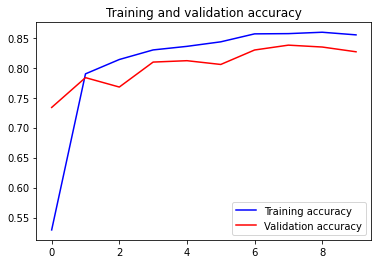

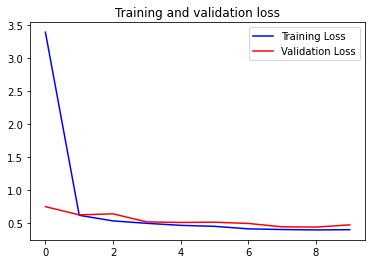

In [23]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
scores = model.evaluate(test_generator)
scores = model.evaluate(train_generator)

113/113 [==============================] - 183s 2s/step - loss: 0.3945 - accuracy: 0.8591


# **TRANSFER LEARNING**

In [25]:
from tensorflow.keras.applications import Xception, InceptionV3
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
import pandas as pd

In [28]:
base_model = InceptionV3(input_shape=(150,150,3),
                          include_top=False)
for layer in base_model.layers:
  layer.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
# x = Dense(1, activation='sigmoid')(x)
predictions = Dense(len(class_names), activation='softmax')(x)
inceptionV3_model = Model(inputs=base_model.input, outputs=predictions)

inceptionV3_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [30]:
inceptionV3_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=3
    )

Epoch 1/3
113/113 [==============================] - 940s 8s/step - loss: 0.9476 - accuracy: 0.7679 - val_loss: 0.3577 - val_accuracy: 0.8774
Epoch 2/3
113/113 [==============================] - 929s 8s/step - loss: 0.3020 - accuracy: 0.9019 - val_loss: 0.2948 - val_accuracy: 0.8981
Epoch 3/3
113/113 [==============================] - 911s 8s/step - loss: 0.2381 - accuracy: 0.9201 - val_loss: 0.2181 - val_accuracy: 0.9257


In [31]:
scores = inceptionV3_model.evaluate(test_generator)
scores = inceptionV3_model.evaluate(train_generator)

113/113 [==============================] - 633s 6s/step - loss: 0.1837 - accuracy: 0.9373


In [32]:
base_model = Xception(input_shape=(150,150,3),
                          include_top=False)
for layer in base_model.layers:
  layer.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
# x = Dense(1, activation='sigmoid')(x)
predictions = Dense(len(class_names), activation='softmax')(x)
xception_model = Model(inputs=base_model.input, outputs=predictions)

xception_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

83697664/83683744 [==============================] - 0s 0us/step


In [33]:
xception_model.fit(
    train_generator, 
    validation_data = test_generator, 
    epochs=3
    )

Epoch 1/3
113/113 [==============================] - 1600s 14s/step - loss: 0.4758 - accuracy: 0.8461 - val_loss: 0.3002 - val_accuracy: 0.8956
Epoch 2/3
113/113 [==============================] - 1583s 14s/step - loss: 0.2308 - accuracy: 0.9245 - val_loss: 0.2076 - val_accuracy: 0.9275
Epoch 3/3
113/113 [==============================] - 1586s 14s/step - loss: 0.1782 - accuracy: 0.9396 - val_loss: 0.1830 - val_accuracy: 0.9390


In [34]:
scores = xception_model.evaluate(test_generator)
scores = xception_model.evaluate(train_generator)

113/113 [==============================] - 1118s 10s/step - loss: 0.1452 - accuracy: 0.9515


In [35]:
model.save('model_V2.h5')
model.save('model_V2')
!zip -r 'model_V2.zip' 'model_V2'

INFO:tensorflow:Assets written to: model_V2/assets
  adding: model_V2/ (stored 0%)
  adding: model_V2/saved_model.pb (deflated 87%)
  adding: model_V2/keras_metadata.pb (deflated 86%)
  adding: model_V2/assets/ (stored 0%)
  adding: model_V2/variables/ (stored 0%)
  adding: model_V2/variables/variables.index (deflated 59%)
  adding: model_V2/variables/variables.data-00000-of-00001 (deflated 7%)


In [36]:
inceptionV3_model.save('inceptionV3_model.h5')
inceptionV3_model.save('inceptionV3_model')
!zip -r 'inceptionV3_model.zip' 'inceptionV3_model'

INFO:tensorflow:Assets written to: inceptionV3_model/assets
  adding: inceptionV3_model/ (stored 0%)
  adding: inceptionV3_model/saved_model.pb (deflated 92%)
  adding: inceptionV3_model/keras_metadata.pb (deflated 96%)
  adding: inceptionV3_model/assets/ (stored 0%)
  adding: inceptionV3_model/variables/ (stored 0%)
  adding: inceptionV3_model/variables/variables.index (deflated 79%)
  adding: inceptionV3_model/variables/variables.data-00000-of-00001 (deflated 7%)


In [37]:
xception_model.save('xception_model.h5')
xception_model.save('xception_model')
!zip -r 'xception_model.zip' 'xception_model'

INFO:tensorflow:Assets written to: xception_model/assets
  adding: xception_model/ (stored 0%)
  adding: xception_model/saved_model.pb (deflated 92%)
  adding: xception_model/keras_metadata.pb (deflated 95%)
  adding: xception_model/assets/ (stored 0%)
  adding: xception_model/variables/ (stored 0%)
  adding: xception_model/variables/variables.index (deflated 79%)
  adding: xception_model/variables/variables.data-00000-of-00001 (deflated 7%)


In [39]:
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model('model_V2')

# Set the optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./model_V2.tflite')
tflite_model_file.write_bytes(tflite_model)

7014912

In [40]:
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model('inceptionV3_model')

# Set the optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./inceptionV3_model.tflite')
tflite_model_file.write_bytes(tflite_model)

24346256

In [42]:
import pathlib

converter = tf.lite.TFLiteConverter.from_saved_model('xception_model')

# Set the optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

tflite_model = converter.convert()

tflite_model_file = pathlib.Path('./xception_model.tflite')
tflite_model_file.write_bytes(tflite_model)

24052192

# **PREDICT IMAGE**

Prediction for Image Below: freshapples


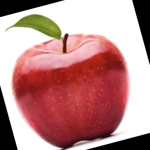

In [63]:
import PIL
import numpy as np

image_path = "/content/dataset/test/freshapples/a_f005.png"

image = PIL.Image.open(image_path)
image_resized = image.resize((150, 150))
image_array = np.array(image_resized).reshape(1, 150, 150, 3)

print("Prediction for Image Below:", class_names[np.argmax(model.predict(image_array))])
image_resized